# Digit recognition with NN
In this notebook I am going to learn more about practical use of Neural Networks 

In [107]:
# libraries 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras import callbacks 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [108]:
# load mnist data set 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [109]:
# Right format for numbers from 0 to 1 
X_train = X_train / 255 
X_test = X_test / 255 

In [122]:
# Reshape features
X_test = X_test.reshape(-1, 28, 28, 1)
print("x_test shape: ", X_test.shape)


x_test shape:  (10000, 28, 28, 1)


In [123]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/Users/minimuh322/miniconda3/envs/study/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [110]:
# create a model 
model = keras.Sequential() 

# Add a flatten layer for the input 
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
# output layer use softmax for probabilities
model.add(layers.Dense(10, activation='softmax'))

/Users/minimuh322/miniconda3/envs/study/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [126]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8511 - loss: 0.4705 - val_accuracy: 0.9825 - val_loss: 0.0575
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9716 - loss: 0.0939 - val_accuracy: 0.9867 - val_loss: 0.0445
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9813 - loss: 0.0635 - val_accuracy: 0.9890 - val_loss: 0.0387
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9841 - loss: 0.0513 - val_accuracy: 0.9908 - val_loss: 0.0361
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9872 - loss: 0.0420 - val_accuracy: 0.9906 - val_loss: 0.0331
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9906 - loss: 0.0328 - val_accuracy: 0.9902 - val_loss: 0.0367
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9896 - loss: 0.0336 - val_accuracy: 0.9912 - val_loss: 0.0345
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9911 -

In [127]:
y_prob = model.predict(X_train)
y_pred = y_prob.argmax(axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


In [128]:
accuracy_score(y_train,y_pred)

0.9981

Plot history and have a look if the train is overfitted or underfitted 

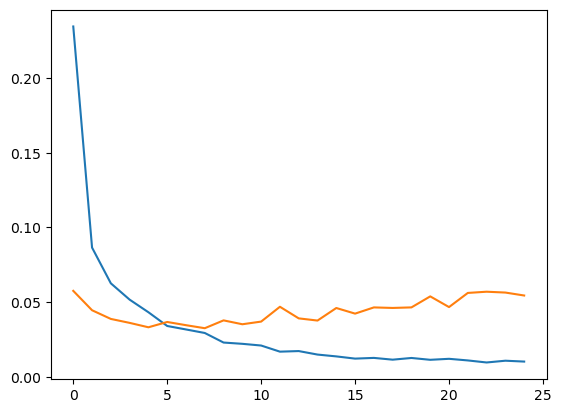

In [129]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

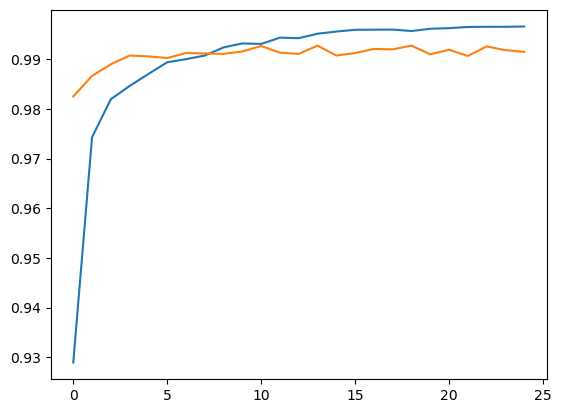

In [130]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [131]:
test_df = pd.read_csv('data/test.csv')
test_values = test_df.values

test_values_reshaped = test_values.reshape(28000, 28, 28)
test_values_reshaped.shape

(28000, 28, 28)

In [132]:
test_out = model.predict(test_values_reshaped)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [120]:
y =test_out.argmax(axis=1)

In [121]:
submission = pd.DataFrame(y, columns=['Label'])
submission.index.name = 'ImageId'
submission.index += 1
submission.to_csv('submission.csv')